In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = "../COVID-19/csse_covid_19_data/csse_covid_19_time_series/"
os.listdir(data_dir)

['time_series_covid19_confirmed_global.csv',
 'time_series_covid19_deaths_global.csv',
 'time_series_covid19_recovered_global.csv',
 'time_series_covid19_confirmed_US.csv',
 '.gitignore',
 'README.md',
 'time_series_covid19_deaths_US.csv']

In [3]:
df1 = pd.read_csv(os.path.join(data_dir, "time_series_covid19_confirmed_global.csv"))
df2 = pd.read_csv(os.path.join(data_dir, "time_series_covid19_deaths_global.csv"))
df3 = pd.read_csv(os.path.join(data_dir, "time_series_covid19_recovered_global.csv"))

skip_col = ["Province/State", "Lat", "Long"]
dfs = []
for df in [df1, df2, df3]:
    temp = df[[ col for col in df.columns if not(col in skip_col)]]
    dates_col = [ col for col in temp if not(col=="Country/Region") ]
    temp2 = temp.groupby("Country/Region")[dates_col].sum()
    dfs.append(temp2)
    #print(temp2.loc["China"]["3/30/20"])
    #print(df[df["Country/Region"]=="China"][["Province/State", "3/30/20"]])#.sum())
    #break
    
print(dfs[0].head())
print(dfs[1].head())
print(dfs[2].head())


                1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
Country/Region                                                                  
Afghanistan           0        0        0        0        0        0        0   
Albania               0        0        0        0        0        0        0   
Algeria               0        0        0        0        0        0        0   
Andorra               0        0        0        0        0        0        0   
Angola                0        0        0        0        0        0        0   

                1/29/20  1/30/20  1/31/20  ...  3/21/20  3/22/20  3/23/20  \
Country/Region                             ...                              
Afghanistan           0        0        0  ...       24       40       40   
Albania               0        0        0  ...       76       89      104   
Algeria               0        0        0  ...      139      201      230   
Andorra               0        0        0  ... 

In [4]:
for df in dfs:
    print(len(df))

178
178
178


In [5]:
dfs2 = []
for df in dfs:
    cols2 = []
    for col in df.columns:
        m,d,y = col.split("/")
        m2 = m.zfill(2)
        d2 = d.zfill(2)
        y2 = "20"+y
        cols2.append("{}/{}/{}".format(y2, m2, d2))
    df = df.rename(columns={ k:v for k,v in zip(df.columns.tolist(), cols2) })
    dfs2.append(df)

In [6]:
dates = []
for df in dfs2:
    dates.append(df.columns.tolist())
print(dates)

[['2020/01/22', '2020/01/23', '2020/01/24', '2020/01/25', '2020/01/26', '2020/01/27', '2020/01/28', '2020/01/29', '2020/01/30', '2020/01/31', '2020/02/01', '2020/02/02', '2020/02/03', '2020/02/04', '2020/02/05', '2020/02/06', '2020/02/07', '2020/02/08', '2020/02/09', '2020/02/10', '2020/02/11', '2020/02/12', '2020/02/13', '2020/02/14', '2020/02/15', '2020/02/16', '2020/02/17', '2020/02/18', '2020/02/19', '2020/02/20', '2020/02/21', '2020/02/22', '2020/02/23', '2020/02/24', '2020/02/25', '2020/02/26', '2020/02/27', '2020/02/28', '2020/02/29', '2020/03/01', '2020/03/02', '2020/03/03', '2020/03/04', '2020/03/05', '2020/03/06', '2020/03/07', '2020/03/08', '2020/03/09', '2020/03/10', '2020/03/11', '2020/03/12', '2020/03/13', '2020/03/14', '2020/03/15', '2020/03/16', '2020/03/17', '2020/03/18', '2020/03/19', '2020/03/20', '2020/03/21', '2020/03/22', '2020/03/23', '2020/03/24', '2020/03/25', '2020/03/26', '2020/03/27', '2020/03/28', '2020/03/29', '2020/03/30'], ['2020/01/22', '2020/01/23', '2

In [7]:
for d in dates[1]:
    if not(d in dates[0]):
        print(d)
for d in dates[2]:
    if not(d in dates[0]):
        print(d)

In [8]:
confirmed = dfs2[0].to_dict(orient="index")
deaths = dfs2[1].to_dict(orient="index")
recovered = dfs2[2].to_dict(orient="index")

In [9]:
adic = {}
df_res = {}
df_long = None
for k,v in confirmed.items():
    #print(k,v)
    #print(sorted(v.keys()))
    flag = False
    day = 0
    pre_confirmed = 0.0
    temp = {}
    for k2 in sorted(v.keys()):
        v2 = v[k2] # total confirmed
        #print(k2,v2)
        if v2>100:
            flag = True
        if not(flag):
            #temp[k2] = {"day":"-", "new_ratio":"-", "death_ratio":"-", "recover_ratio":"-", "active_ratio":"-"}
            continue
        else:
            n = v2 - pre_confirmed # new confirmed
            nr = n / v2
            d = deaths[k][k2] # total deaths
            dr = d / v2
            r = recovered[k][k2] # total recovered
            rr = r / v2
            a = v2 - d - r # total active
            ar = a / v2
            pre_confirmed = v2
            temp[k2] = {"day":day, "new_ratio":nr, "death_ratio":dr, "recover_ratio":rr, "active_ratio":ar}
            day+=1
    adic[k] = temp
    temp2 = pd.DataFrame.from_dict(temp, orient="index")
    #print(temp2.head())
    temp2 = temp2.reset_index()
    temp2 = temp2.rename(columns={"index":"date"})
    df_res[k] = temp2
    temp2["country"] = k
    if df_long is None:
        df_long = temp2
    else:
        df_long = df_long.append(temp2)
    #print(temp2)
    #break
#df_ratio = pd.DataFrame.from_dict(adic)
#df_ratio.head()

/home/benny/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Text(0.5, 1.0, 'China dynamic ratio of four types')

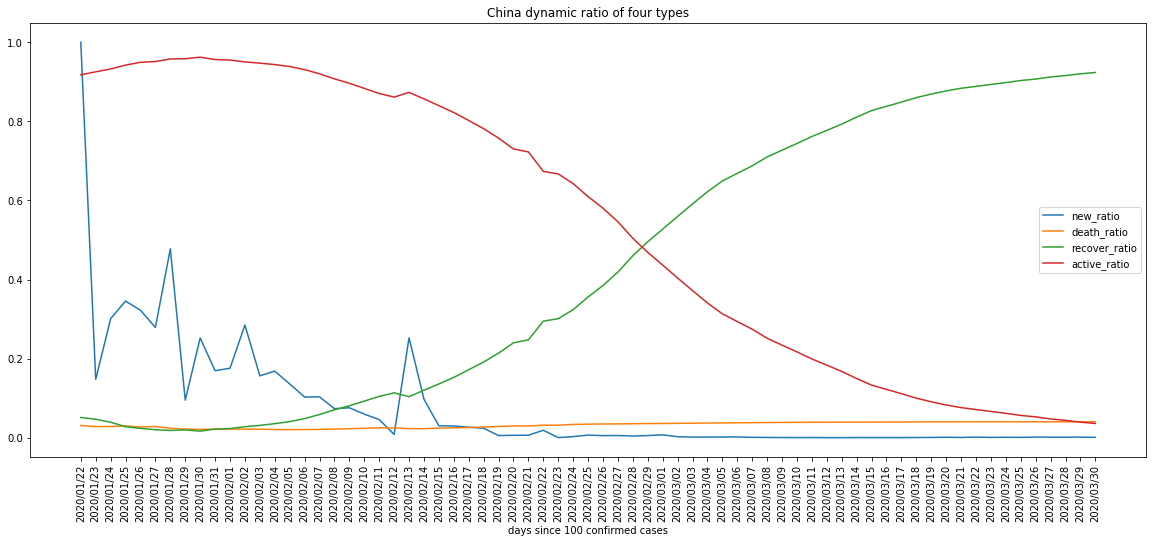

In [21]:
c = "China"

fig, ax = plt.subplots(figsize=(20,8))
this_df = df_res[c]

for y in ["new_ratio", "death_ratio", "recover_ratio", "active_ratio"]:
    ax.plot(this_df["date"], this_df[y], label=y)
ax.legend()
ax.set_xlabel("days since 100 confirmed cases")
ax.set_xticklabels(this_df["date"], rotation=90)
ax.set_title("{} dynamic ratio of four types".format(c))
#print(list(ax.get_xticklabels()))

Text(0.5, 1.0, 'China dynamic ratio of four types')

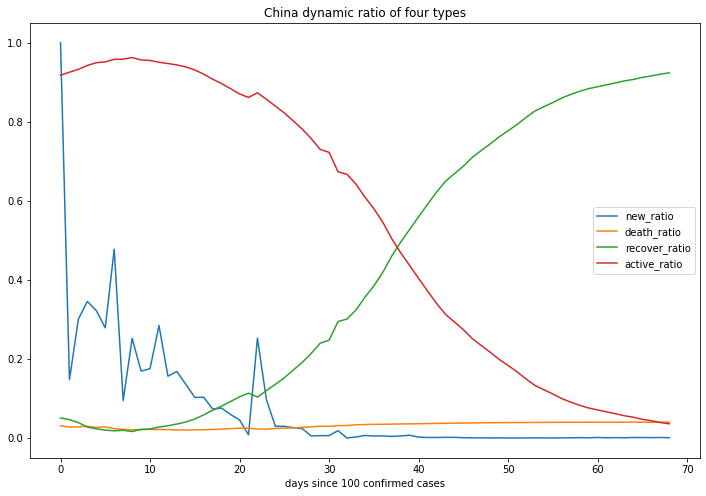

In [205]:
c = "China"

fig, ax = plt.subplots(figsize=(12,8))
this_df = df_res[c]

for y in ["new_ratio", "death_ratio", "recover_ratio", "active_ratio"]:
    ax.plot(this_df["day"], this_df[y], label=y)
ax.legend()
ax.set_xlabel("days since 100 confirmed cases")
ax.set_title("{} dynamic ratio of four types".format(c))

Text(0.5, 1.0, 'US dynamic ratio of four types')

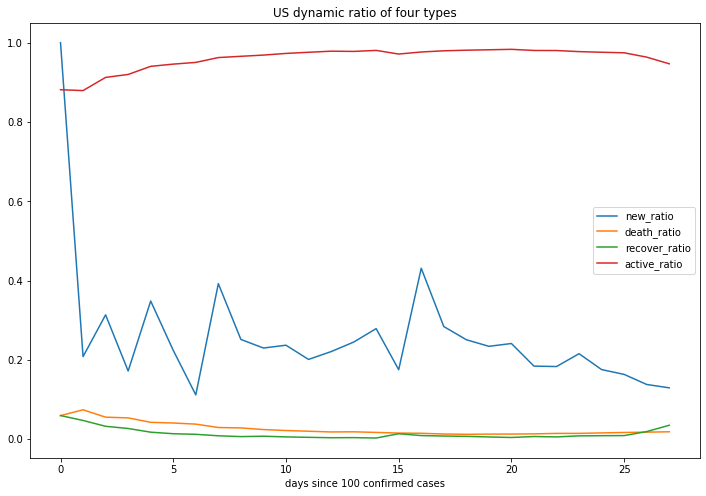

In [206]:
c = "US"

fig, ax = plt.subplots(figsize=(12,8))
this_df = df_res[c]

for y in ["new_ratio", "death_ratio", "recover_ratio", "active_ratio"]:
    ax.plot(this_df["day"], this_df[y], label=y)
ax.legend()
ax.set_xlabel("days since 100 confirmed cases")
ax.set_title("{} dynamic ratio of four types".format(c))

Text(0.5, 1.0, 'Singapore dynamic ratio of four types')

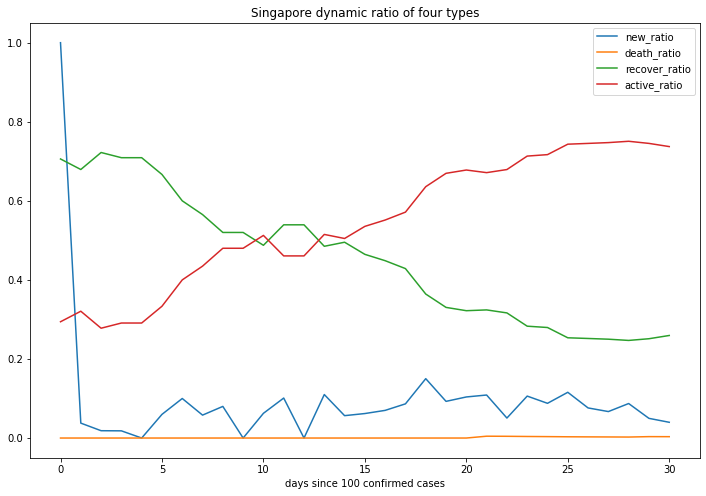

In [207]:
c = "Singapore"

fig, ax = plt.subplots(figsize=(12,8))
this_df = df_res[c]

for y in ["new_ratio", "death_ratio", "recover_ratio", "active_ratio"]:
    ax.plot(this_df["day"], this_df[y], label=y)
ax.legend()
ax.set_xlabel("days since 100 confirmed cases")
ax.set_title("{} dynamic ratio of four types".format(c))

Text(0.5, 1.0, 'Malaysia dynamic ratio of four types')

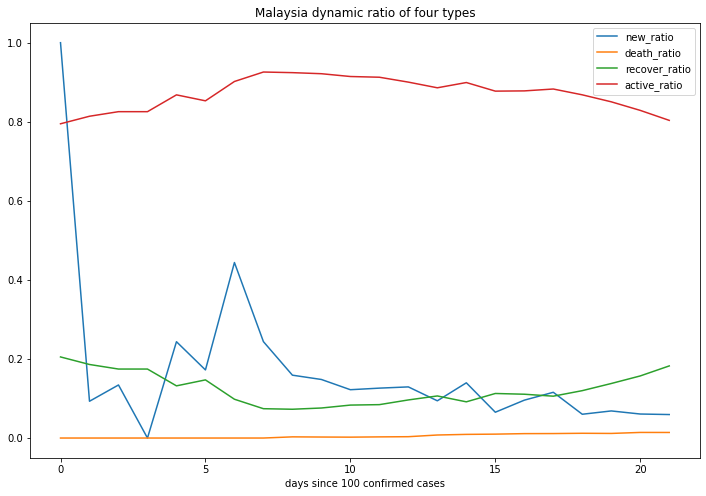

In [208]:
c = "Malaysia"

fig, ax = plt.subplots(figsize=(12,8))
this_df = df_res[c]

for y in ["new_ratio", "death_ratio", "recover_ratio", "active_ratio"]:
    ax.plot(this_df["day"], this_df[y], label=y)
ax.legend()
ax.set_xlabel("days since 100 confirmed cases")
ax.set_title("{} dynamic ratio of four types".format(c))

Text(0.5, 1.0, 'Italy dynamic ratio of four types')

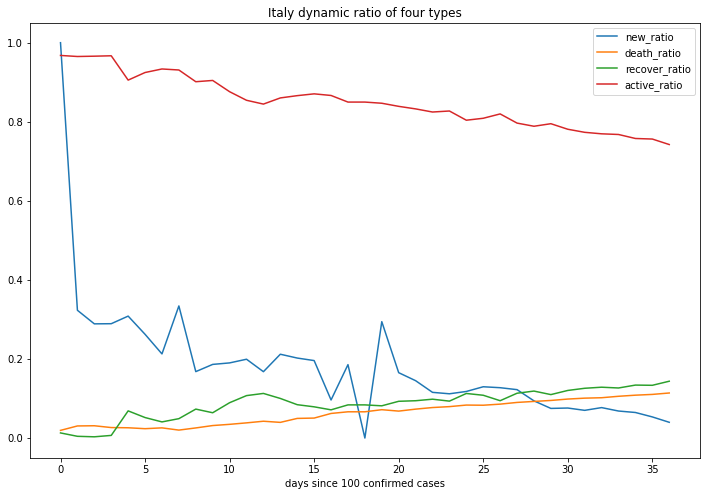

In [199]:
c = "Italy"

fig, ax = plt.subplots(figsize=(12,8))
this_df = df_res[c]

for y in ["new_ratio", "death_ratio", "recover_ratio", "active_ratio"]:
    ax.plot(this_df["day"], this_df[y], label=y)
ax.legend()
ax.set_xlabel("days since 100 confirmed cases")
ax.set_title("{} dynamic ratio of four types".format(c))

In [184]:
df_res.keys()

dict_keys(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',

In [185]:
df_long.head()

,date,day,new_ratio,death_ratio,recover_ratio,active_ratio,country
0,2020/02/24,0,1.0,0.0,0.0,1.0,Afghanistan
1,2020/02/25,1,0.0,0.0,0.0,1.0,Afghanistan
2,2020/02/26,2,0.0,0.0,0.0,1.0,Afghanistan
3,2020/02/27,3,0.0,0.0,0.0,1.0,Afghanistan
4,2020/02/28,4,0.0,0.0,0.0,1.0,Afghanistan


In [210]:
df_long2 = df_long[df_long["new_ratio"]!="-"]
df_long2.head()

,active_ratio,country,date,day,death_ratio,new_ratio,recover_ratio
0,0.945455,Afghanistan,2020/03/27,0.0,0.036364,1.000000,0.018182
1,0.945455,Afghanistan,2020/03/28,1.0,0.036364,0.000000,0.018182
2,0.950000,Afghanistan,2020/03/29,2.0,0.033333,0.083333,0.016667
3,0.964706,Afghanistan,2020/03/30,3.0,0.023529,0.294118,0.011765
0,0.942308,Albania,2020/03/23,0.0,0.038462,1.000000,0.019231


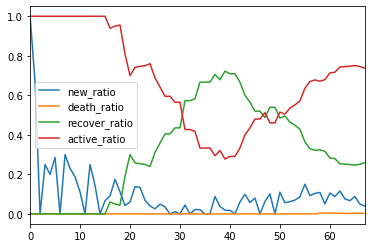

In [187]:
c = "Singapore"
temp = df_long2[df_long2["country"]==c]
temp[["new_ratio", "death_ratio", "recover_ratio", "active_ratio"]].plot()

In [188]:
print(sorted(list(set(df_long2["country"].tolist()))))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', '

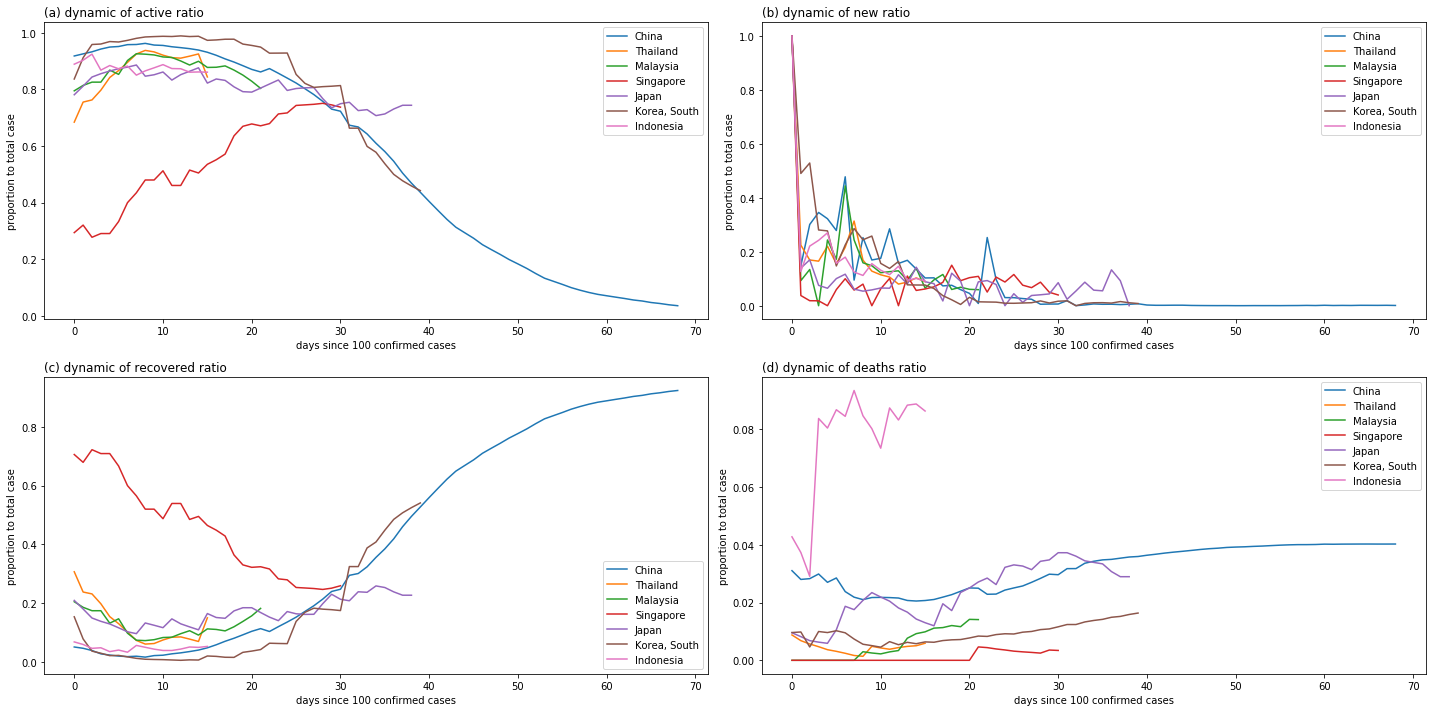

In [211]:
#cs = sorted(list(set(df_long2["country"].tolist())))
#cs = ["China", "US", "Italy", "Singapore", "Japan", "Franch"]
#cs = ["China", "Taiwan*", "Malaysia", "Singapore"]
cs = ["China", "Thailand", "Malaysia", "Singapore", "Japan", "Korea, South", "Indonesia"]

fig, axg = plt.subplots(2, 2, figsize=(20,10))
axs = axg.flatten()

for c in cs:
    temp = df_long2[df_long2["country"]==c]
    axs[0].plot(temp["day"], temp["active_ratio"], label=c)
    axs[1].plot(temp["day"], temp["new_ratio"], label=c)
    axs[2].plot(temp["day"], temp["recover_ratio"], label=c)
    axs[3].plot(temp["day"], temp["death_ratio"], label=c)

labs = "abcd"
titles = ["active", "new", "recovered", "deaths"]
for i in range(len(axs)):
    ax = axs[i]
    ax.set_title("({}) dynamic of {} ratio".format(labs[i], titles[i]), loc="left")
    ax.legend()
    ax.set_xlabel("days since 100 confirmed cases")
    ax.set_ylabel("proportion to total case")
plt.tight_layout()
plt.savefig("countries_set_1.png", bbox_inches="tight", dpi=90)

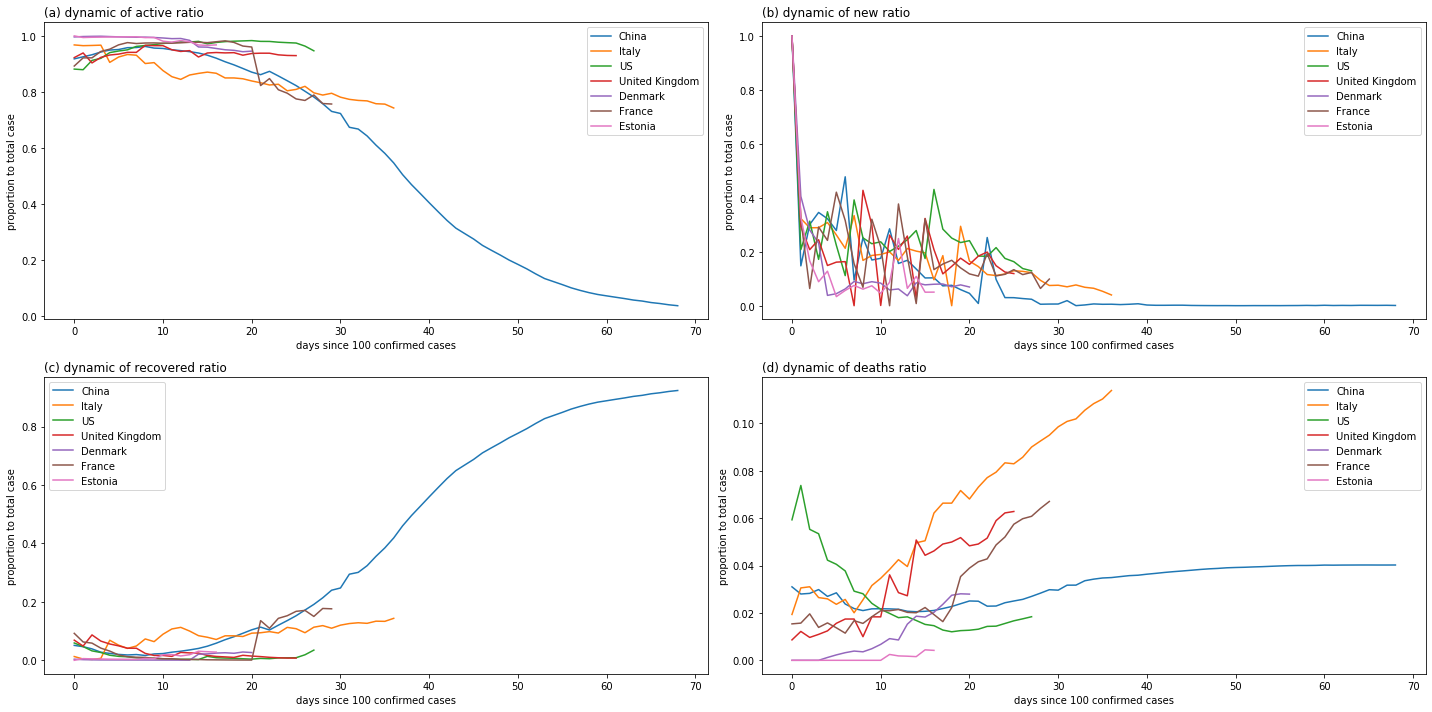

In [212]:

cs = ["China", "Italy", "US", "United Kingdom", "Denmark", "France", "Estonia"]

fig, axg = plt.subplots(2, 2, figsize=(20,10))
axs = axg.flatten()

for c in cs:
    temp = df_long2[df_long2["country"]==c]
    axs[0].plot(temp["day"], temp["active_ratio"], label=c)
    axs[1].plot(temp["day"], temp["new_ratio"], label=c)
    axs[2].plot(temp["day"], temp["recover_ratio"], label=c)
    axs[3].plot(temp["day"], temp["death_ratio"], label=c)

labs = "abcd"
titles = ["active", "new", "recovered", "deaths"]
for i in range(len(axs)):
    ax = axs[i]
    ax.set_title("({}) dynamic of {} ratio".format(labs[i], titles[i]), loc="left")
    ax.legend()
    ax.set_xlabel("days since 100 confirmed cases")
    ax.set_ylabel("proportion to total case")
plt.tight_layout()
plt.savefig("countries_set_2.png", bbox_inches="tight", dpi=90)

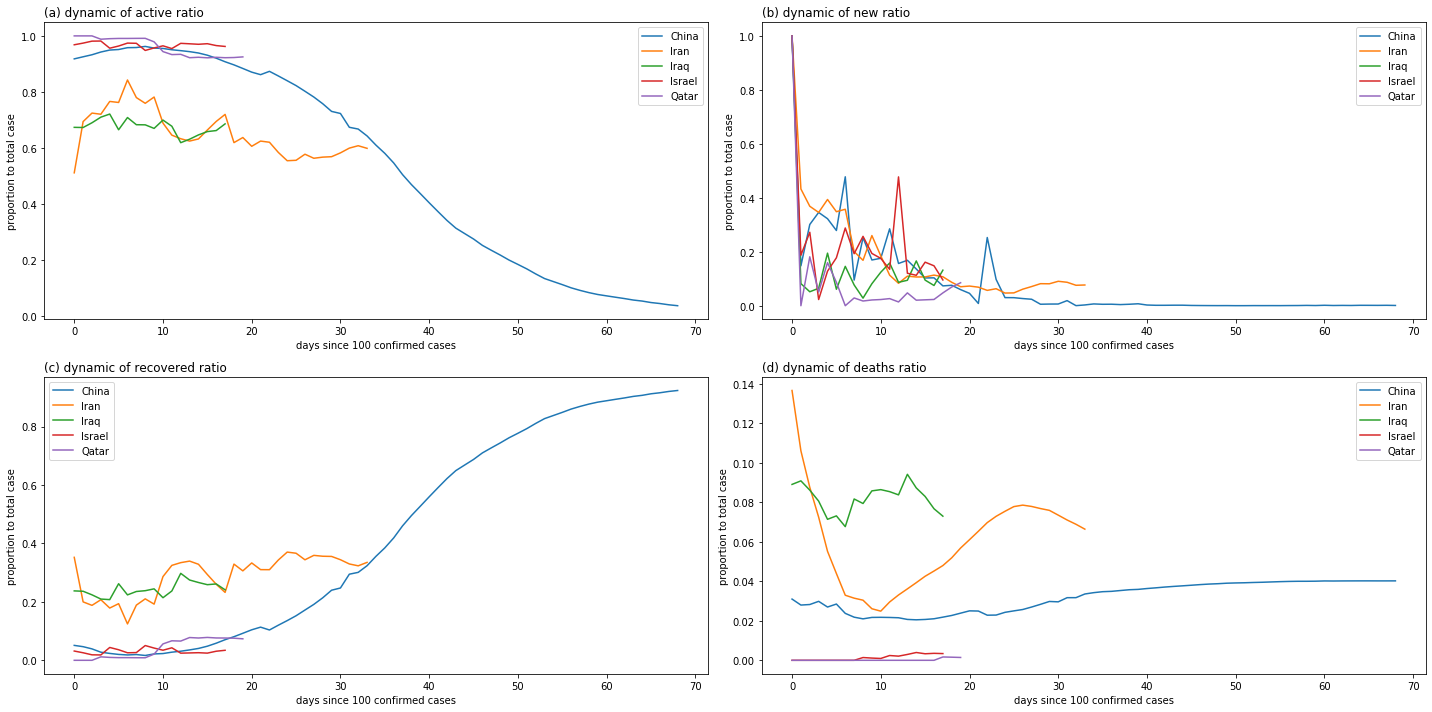

In [213]:

cs = ["China", "Iran", "Iraq", "Israel", "Qatar"]

fig, axg = plt.subplots(2, 2, figsize=(20,10))
axs = axg.flatten()

for c in cs:
    temp = df_long2[df_long2["country"]==c]
    axs[0].plot(temp["day"], temp["active_ratio"], label=c)
    axs[1].plot(temp["day"], temp["new_ratio"], label=c)
    axs[2].plot(temp["day"], temp["recover_ratio"], label=c)
    axs[3].plot(temp["day"], temp["death_ratio"], label=c)

labs = "abcd"
titles = ["active", "new", "recovered", "deaths"]
for i in range(len(axs)):
    ax = axs[i]
    ax.set_title("({}) dynamic of {} ratio".format(labs[i], titles[i]), loc="left")
    ax.legend()
    ax.set_xlabel("days since 100 confirmed cases")
    ax.set_ylabel("proportion to total case")
plt.tight_layout()
plt.savefig("countries_set_3.png", bbox_inches="tight", dpi=90)
